In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import json
import requests
from datetime import datetime
from ast import literal_eval as make_tuple
from bs4 import BeautifulSoup

from functions.plot_prod import plot_prod

In [3]:
sns.set_style("whitegrid")

In [171]:
start = '22/10/2020'
stop  = '21/10/2021'

In [172]:
url = f'https://eco2mix.rte-france.com/curves/getDonneesMarche?&dateDeb={start}&dateFin={stop}&mode=NORM&_=1634892133168'

In [173]:
s = requests.Session()
r = s.get(url)
    
s.close()

soup = BeautifulSoup(r.text)

In [174]:
donneesmarche = soup.find_all('donneesmarche')

In [175]:
data = {}

for day in donneesmarche:
    
    date = day['date']
    
    series = day.find_all('type')
    
    for s in series:
        
        zone = s['perimetre']
        
        if zone not in data.keys():
            data[zone] = {}
        
        for v in s.find_all('valeur'):
            period = datetime.strptime(date + ' ' + v['periode'],'%Y-%m-%d %H')
            try:
                data[zone][period] = float(v.text) 
            except ValueError:
                data[zone][period] = np.nan
        

<AxesSubplot:>

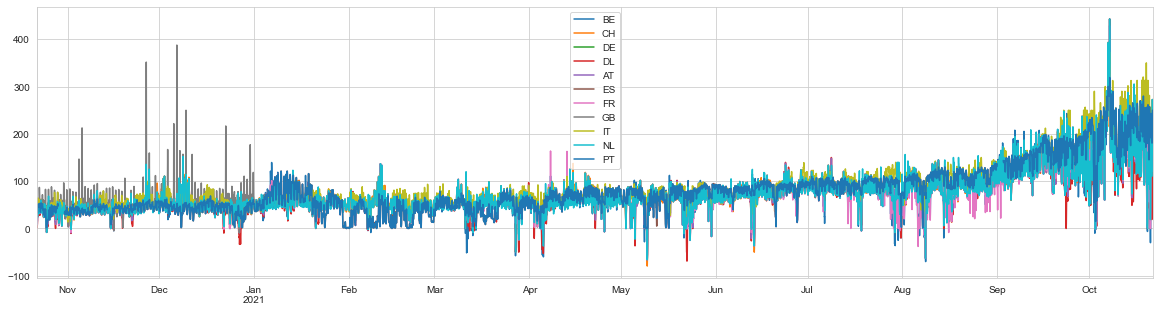

In [176]:
prices = pd.DataFrame(data)
prices.plot(figsize=(20,5))

<AxesSubplot:>

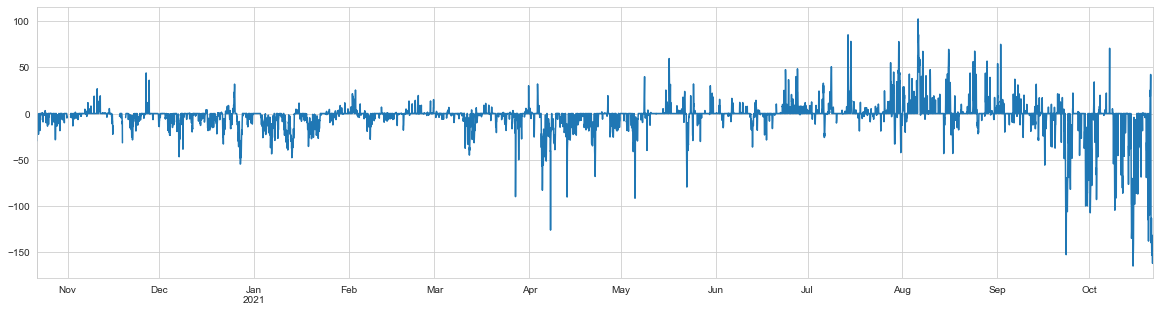

In [177]:
(prices['DL']-prices['FR']).plot(figsize=(20,5))

<AxesSubplot:ylabel='Frequency'>

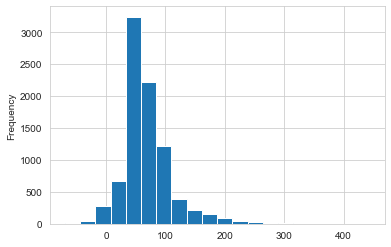

In [178]:
prices['DL'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

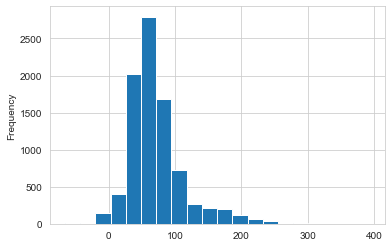

In [179]:
prices['FR'].plot.hist(bins=20)

In [180]:
prices['FR'].describe()

count    8760.000000
mean       71.572515
std        43.590583
min       -66.180000
25%        45.567500
50%        62.010000
75%        85.422500
max       393.100000
Name: FR, dtype: float64

In [181]:
prices['DL'].describe()

count    8664.000000
mean       68.459589
std        42.318001
min       -69.000000
25%        44.260000
50%        59.625000
75%        84.900000
max       442.900000
Name: DL, dtype: float64

In [195]:
prices=prices.loc[prices['DL'].dropna().index]

R=0.92, p=0


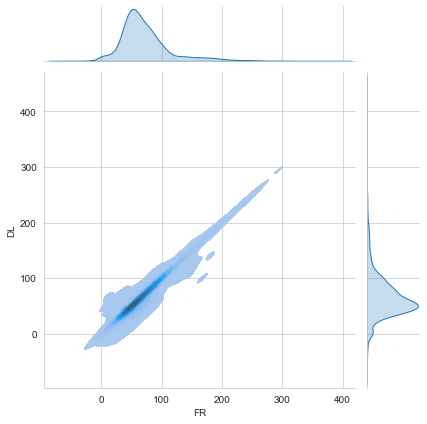

In [196]:
x = 'FR'
y = 'DL'

sns.jointplot(data=prices,
              x=x,
              y=y,
              kind='kde',
              fill=True,
#               cbar=True,
              )

r, p = stats.pearsonr(prices[x], prices[y])

print(f'R={r:.2f}, p={p:g}')

In [251]:
delta=(prices['FR']-prices['DL']).reset_index()

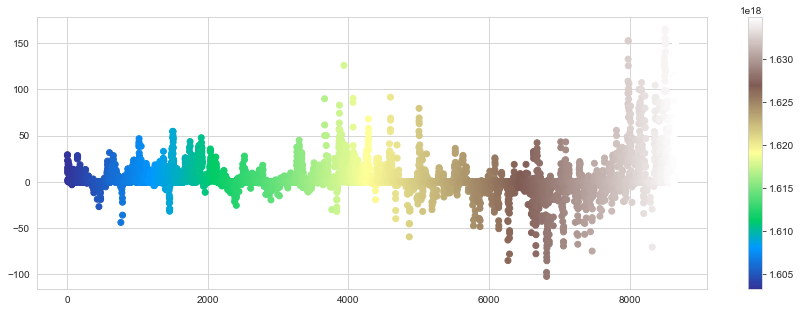

In [252]:
fig, ax = plt.subplots(figsize=(15,5))
sc = plt.scatter(x=delta.index, y=delta[0], c=delta['index'], cmap='terrain')
cb = fig.colorbar(sc)